In [257]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Download and prepare the data
data = pd.read_csv('data.csv', delimiter=';')
drop_out = pd.DataFrame(data)
pd.set_option('display.max_columns', None)
sample = drop_out.sample(n=10, replace=False)
sample
#drop_out.info()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4126,1,1,3,9085,1,1,134.0,1,38,19,9,5,129.1,0,0,0,1,0,0,19,0,0,5,7,3,12.000000,0,0,5,7,4,13.500000,0,7.6,2.6,0.32,Enrolled
2292,1,18,1,9147,1,1,131.0,1,34,34,90,90,131.0,0,0,0,1,1,0,22,0,0,5,11,3,13.666667,0,0,5,10,3,11.333333,0,9.4,-0.8,-3.12,Dropout
2322,2,39,1,9991,0,1,130.0,1,37,37,9,9,140.0,1,0,0,1,1,0,31,0,0,5,8,1,11.000000,0,0,5,5,1,13.000000,0,9.4,-0.8,-3.12,Dropout
4402,1,18,2,9853,1,1,168.0,1,1,19,3,9,126.8,1,0,0,1,1,0,18,0,0,6,7,5,12.600000,0,0,6,6,6,13.000000,0,10.8,1.4,1.74,Enrolled
3156,1,43,1,9003,1,1,125.0,1,1,38,4,7,125.0,1,0,0,1,0,0,21,0,9,14,23,9,12.000000,2,6,12,21,8,11.250000,0,15.5,2.8,-4.06,Graduate
446,1,1,1,9500,1,1,128.0,1,3,1,2,1,127.8,0,0,0,1,0,1,19,0,0,7,8,7,14.412500,0,0,8,8,8,16.050000,0,13.9,-0.3,0.79,Graduate
1560,1,15,1,33,1,1,133.1,41,2,3,2,4,100.0,0,0,0,1,1,0,20,1,0,7,10,7,12.857143,0,0,7,7,4,12.750000,0,8.9,1.4,3.51,Enrolled
1301,1,1,5,9254,1,1,120.0,1,3,19,3,9,114.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,8.9,1.4,3.51,Dropout
2892,1,1,2,9670,1,1,131.0,1,1,19,4,7,135.9,1,0,0,1,0,1,18,0,0,6,6,6,13.166667,0,0,6,8,6,12.428571,0,8.9,1.4,3.51,Graduate
49,1,1,1,9238,1,1,139.0,1,37,38,9,9,126.1,0,0,0,1,0,1,19,0,0,6,7,5,12.333333,0,0,6,7,6,12.833333,0,12.7,3.7,-1.70,Graduate


In [258]:
from sklearn.preprocessing import LabelEncoder
# Define the mapping logic to group three categories into two
# Assuming the original target values are 0, 1, and 2
# You can modify this mapping based on your needs
drop_out['Target'] = drop_out['Target'].map({
    'Graduate': 0,  # Keep category 0 as 0
    'Enrolled': 0,  # Group category 1 with 0
    'Dropout': 1   # Keep category 2 as a separate class (or merge with another class if needed)
})

drop_out['Target'].head()
#drop_out.info()

#drop_out.apply(lambda x: sum(x.isnull()))
drop_out.describe()
#drop_out.Target.unique()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.321203
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


In [259]:
skew_limit = 0.75 #define a skew limit for log transformation
skew_values = drop_out.skew()
skew_values

Marital status                                     4.399764
Application mode                                   0.393036
Application order                                  1.881050
Course                                            -3.809135
Daytime/evening attendance\t                      -2.507238
Previous qualification                             2.871207
Previous qualification (grade)                     0.312867
Nacionality                                       10.703998
Mother's qualification                             0.001978
Father's qualification                            -0.298697
Mother's occupation                                5.339227
Father's occupation                                5.395173
Admission grade                                    0.530600
Displaced                                         -0.194468
Educational special needs                          9.154976
Debtor                                             2.434652
Tuition fees up to date                 

In [260]:
skew_cols = skew_values[abs(skew_values)>skew_limit].sort_values(ascending=False)
skew_cols

Nacionality                                       10.703998
Educational special needs                          9.154976
Curricular units 1st sem (without evaluations)     8.207403
Curricular units 2nd sem (without evaluations)     7.267701
International                                      6.104830
Father's occupation                                5.395173
Mother's occupation                                5.339227
Curricular units 2nd sem (credited)                4.634820
Marital status                                     4.399764
Curricular units 1st sem (credited)                4.169049
Previous qualification                             2.871207
Debtor                                             2.434652
Age at enrollment                                  2.054988
Application order                                  1.881050
Curricular units 1st sem (enrolled)                1.619041
Scholarship holder                                 1.164871
Curricular units 1st sem (evaluations)  

In [261]:
# field = 'Age at enrollment'
# fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
# drop_out[field].hist(ax=ax_before)
# drop_out[field].apply(np.sqrt).hist(ax=ax_after)

In [262]:
# for col in skew_cols.index.values:
#     drop_out[col] = drop_out[col].apply(np.log1p)

In [263]:
#sns.pairplot(drop_out, plot_kws=dict(alpha=0.1, edgecolor='none'))

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


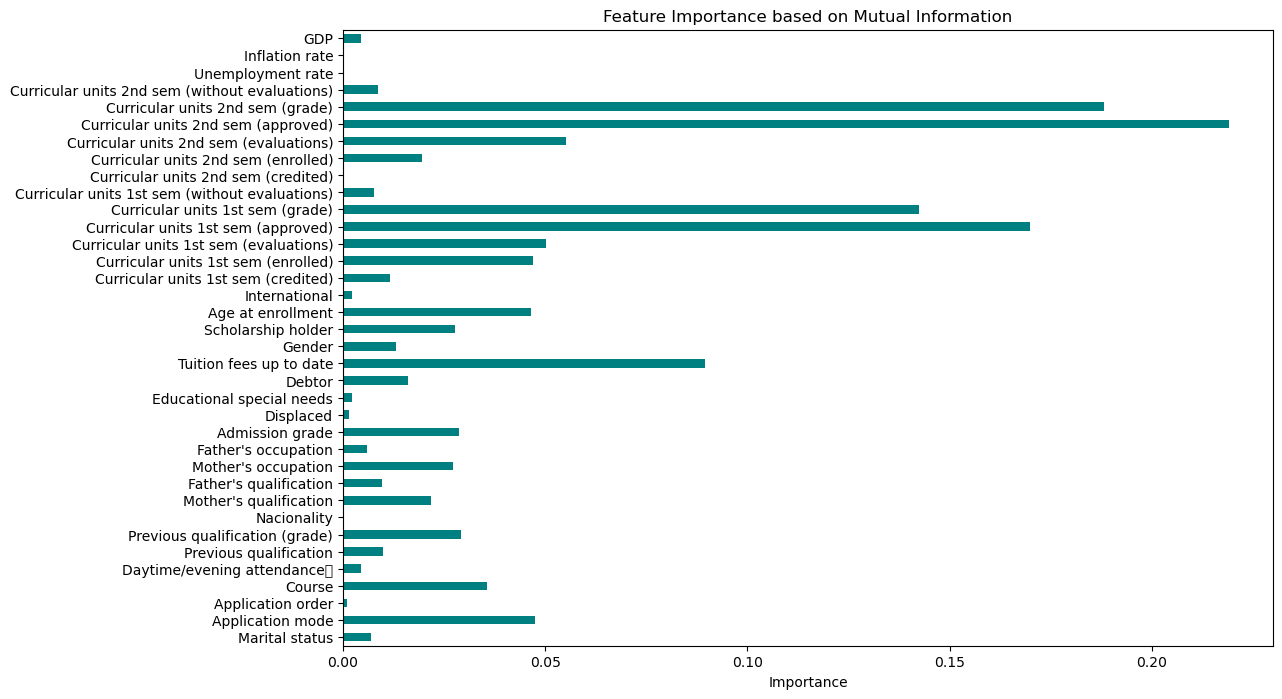

In [264]:
#visualizing the data
from sklearn.feature_selection import mutual_info_classif

features = drop_out.drop(columns=['Target'])

# Compute mutual information
importances = mutual_info_classif(features, drop_out['Target'])

# Create a pandas Series with feature importances and correct feature names
feat_importances = pd.Series(importances, index=features.columns)

# Plot the feature importances
feat_importances.plot(kind='barh', color='teal', figsize=(12, 8))
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Importance')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


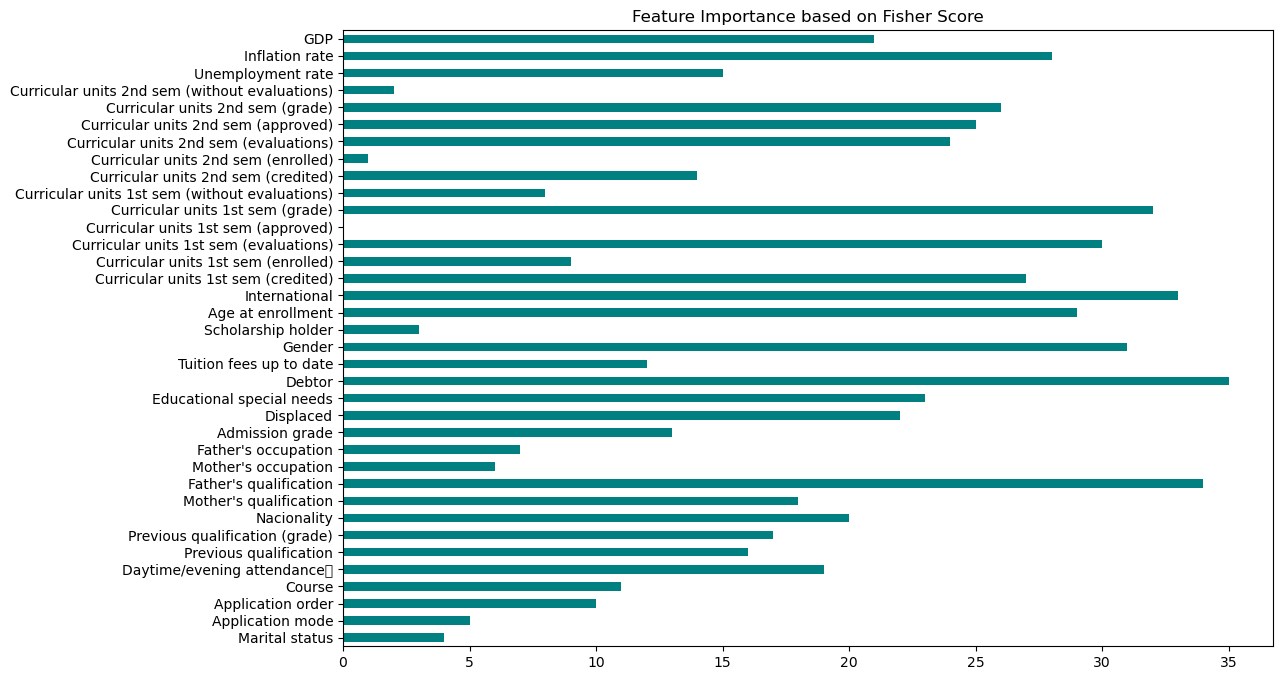

In [265]:
from skfeature.function.similarity_based import fisher_score

target = drop_out['Target'].values

features = drop_out.drop(columns=['Target'])

ranks = fisher_score.fisher_score(features.values, target)

import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(ranks, index=features.columns)
feat_importances.plot(kind='barh', color='teal', figsize=(12, 8))
plt.title('Feature Importance based on Fisher Score')
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


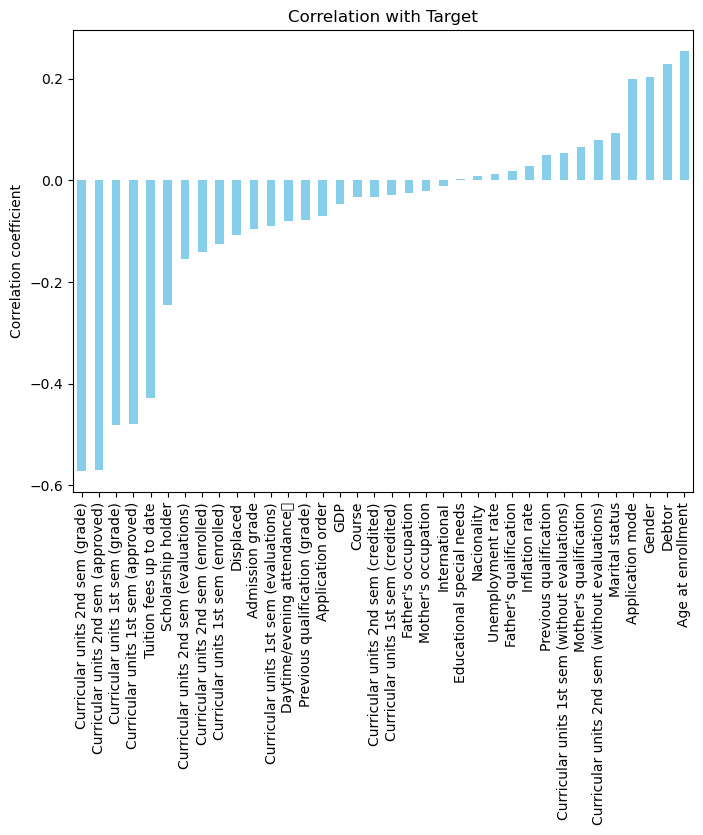

In [266]:
# Correlation of all features with the 'Target' column
correlation_with_target = drop_out.corr()['Target'].sort_values()

# Bar plot of the correlations
plt.figure(figsize=(8, 6))
correlation_with_target.drop('Target').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target')
plt.ylabel('Correlation coefficient')
plt.show()
#chart showed that curricular grades for both semester and tuition fees have a strong correlation with the Target

In [267]:
#list of important features from hypothesis, insights and feature selection
important_features = ["Previous qualification",
                      "Debtor",
                      "Father's qualification",
                      "Application order",
                        "Mother's occupation",
                        "Father's occupation",
                        "Tuition fees up to date",
                        "Scholarship holder",
                        "Admission grade",
                        "Curricular units 2nd sem (approved)",
                        "Curricular units 2nd sem (grade)",
                        "Curricular units 1st sem (approved)",
                        "Curricular units 1st sem (grade)",
                     "Curricular units 2nd sem (enrolled)",
                     "Curricular units 1st sem (evaluations)"]

In [268]:
# Check for outliers in the important features
for feature in important_features:
    Q1 = drop_out[feature].quantile(0.25)
    Q3 = drop_out[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = drop_out[(drop_out[feature] < lower_bound) | (drop_out[feature] > upper_bound)]
    
    print(f"{feature}: Number of outliers = {len(outliers)}")

Previous qualification: Number of outliers = 707
Debtor: Number of outliers = 503
Father's qualification: Number of outliers = 0
Application order: Number of outliers = 541
Mother's occupation: Number of outliers = 182
Father's occupation: Number of outliers = 177
Tuition fees up to date: Number of outliers = 528
Scholarship holder: Number of outliers = 1099
Admission grade: Number of outliers = 86
Curricular units 2nd sem (approved): Number of outliers = 44
Curricular units 2nd sem (grade): Number of outliers = 877
Curricular units 1st sem (approved): Number of outliers = 180
Curricular units 1st sem (grade): Number of outliers = 726
Curricular units 2nd sem (enrolled): Number of outliers = 369
Curricular units 1st sem (evaluations): Number of outliers = 158


In [269]:
for feature in important_features:
#     Q1 = drop_out[feature].quantile(0.25)
#     Q3 = drop_out[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Cap the outliers
#     drop_out[feature] = np.where(drop_out[feature] < lower_bound, lower_bound, drop_out[feature])
#     drop_out[feature] = np.where(drop_out[feature] > upper_bound, upper_bound, drop_out[feature])
    drop_out[feature] = drop_out[feature].apply(np.log1p)


In [270]:
#Scaling the features
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# from sklearn.model_selection import train_test_split

# X = drop_out[important_features]
# y = drop_out['Target']

# # Spliting the data (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()

# # Scale the selected features
# scaled_features = scaler.fit_transform(drop_out[important_features])

# # Replace the original features with the scaled ones
# drop_out[important_features] = scaled_features
# drop_out[important_features].head()


# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)

# # transform testing dataabs
# X_test_norm = norm.transform(X_test)

# data standardization

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()


# apply standardization on numerical features
# for i in important_features:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_stand[[i]])
    
#     # transform the training data column
#     X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
#     # transform the testing data column
#     X_test_stand[i] = scale.transform(X_test_stand[[i]])
    

# # data normalization
# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)
# print("Scaled Train Data: \n\n")
# print(X_train_norm)

# # transform testing dataabs
# X_test_norm = norm.transform(X_test)
# print("\n\nScaled Test Data: \n\n")
# print(X_test_norm)
    

In [271]:

#applying model, random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

model_rfc = GradientBoostingClassifier(random_state=42)
rmse = []

# raw, normalized, and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and evaluation


# Fit the model on training data
model_rfc.fit(X_train, y_train)

# Predict class labels on test data
y_pred = model_rfc.predict(X_test)

# Predict probabilities on test data (for ROC-AUC and RMSE)
y_pred_proba = model_rfc.predict_proba(X_test)[:, 1]

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:", accuracy)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score:", roc_auc)

# Compute RMSE using predicted probabilities
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred_proba))
rmse.append(rmse_value)
print(f"RMSE:", rmse_value)



Accuracy: 0.8655367231638418
ROC-AUC Score: 0.9054804120041825
RMSE: 0.32802174469888923


In [272]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rfc, X, y, cv=5)
print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.2f}')


Cross-Validation Accuracy: 0.87


In [250]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GradientBoostingClassifier
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [1, 2, 3]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [255]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters after further tuning:", grid_search.best_params_)
print("Best Score after further tuning:", grid_search.best_score_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters after further tuning: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 0.9}
Best Score after further tuning: 0.8776496535852132


In [280]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'subsample': uniform(0.7, 0.3),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=50, scoring='accuracy', n_jobs=-1, cv=5, random_state=42
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packages\skle

Best Parameters: {'learning_rate': 0.0276985004103839, 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.7975990992289792}
Best Score: 0.8765197100823883


In [273]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report, accuracy_score

# Define the model with the best parameters found
model = GradientBoostingClassifier(
                                    learning_rate=0.1,
                                    max_depth=4,
                                    max_features=None,
                                    min_samples_split=10,
                                    n_estimators=100,
                                    subsample=0.9,
                                    random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict class labels on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Test Accuracy: 0.8677966101694915
Precision: 0.8679562168031705
Recall: 0.8677966101694915
F1 Score: 0.8651076306944147
Confusion Matrix:
 [[534  35]
 [ 82 234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       569
           1       0.87      0.74      0.80       316

    accuracy                           0.87       885
   macro avg       0.87      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



In [253]:
# First, fit the model to your training data
model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Now predict class labels on the test set
y_pred = model.predict(X_test)

# After fitting, you can continue with evaluation
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Precision: 0.8663025809745298
Recall: 0.8655367231638418
F1 Score: 0.8623743678714447
Confusion Matrix:
 [[536  33]
 [ 86 230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       569
           1       0.87      0.73      0.79       316

    accuracy                           0.87       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.87      0.87      0.86       885



In [274]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.8700565  0.88926554 0.86440678 0.8779661  0.86199095]
Mean CV Score: 0.8727371730960964


In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Test Accuracy: {rf_accuracy}")

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Test Accuracy: {lr_accuracy}")

# Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"SVM Test Accuracy: {svc_accuracy}")


Random Forest Test Accuracy: 0.8576271186440678
Logistic Regression Test Accuracy: 0.8542372881355932
SVM Test Accuracy: 0.8384180790960452


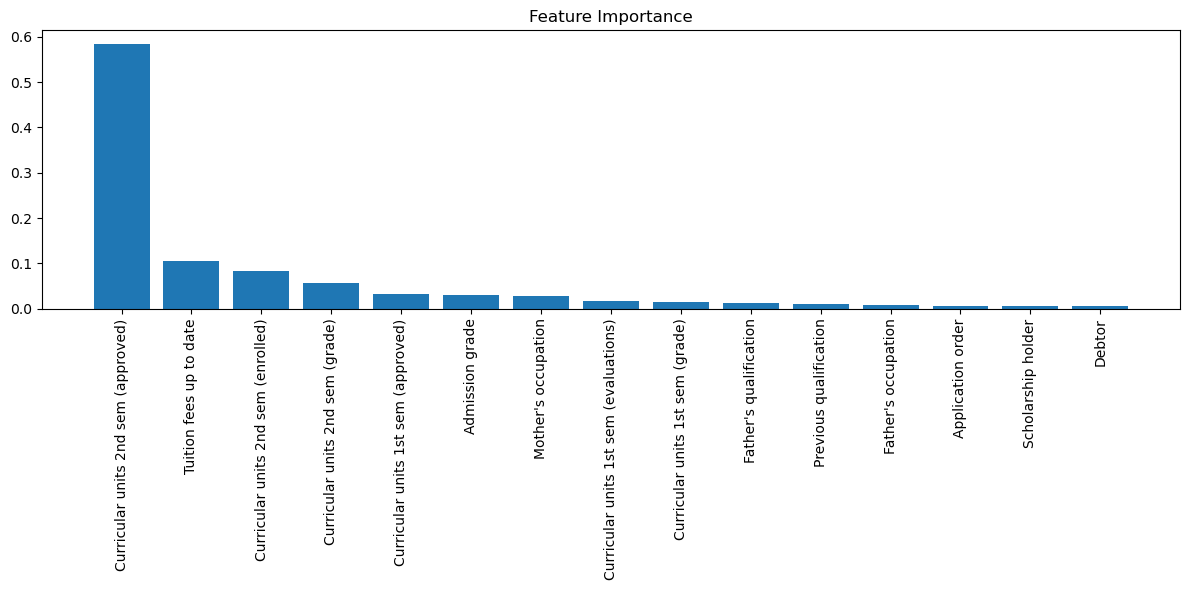

In [278]:
import matplotlib.pyplot as plt
import numpy as np

# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns  # Replace with the feature names if you have them

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


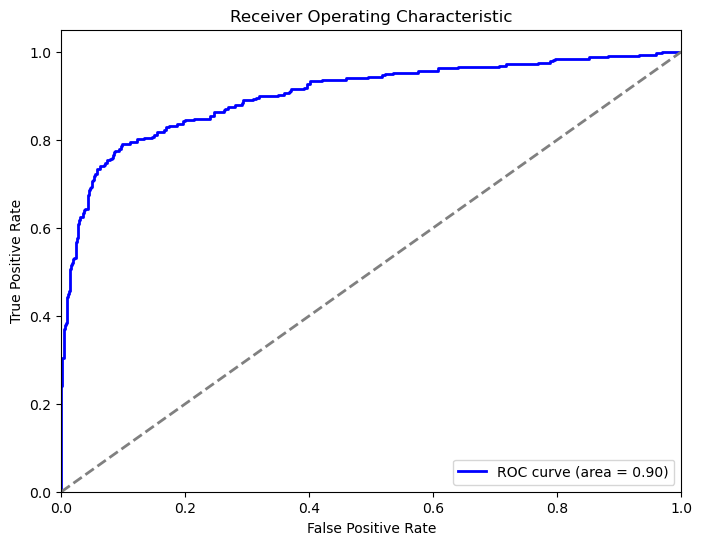

In [279]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [281]:
import pandas as pd

# Get misclassified examples
X_test['true_labels'] = y_test
X_test['predictions'] = y_pred
misclassified = X_test[X_test['true_labels'] != X_test['predictions']]

print("Number of Misclassified Samples:", len(misclassified))
print(misclassified.head())  # Show a few misclassified samples


Number of Misclassified Samples: 117
      Previous qualification  Debtor  Father's qualification  \
287                 2.772589     0.0                0.693147   
1366                0.693147     0.0                2.995732   
179                 1.386294     0.0                0.693147   
3112                0.693147     0.0                0.693147   
2594                0.693147     0.0                2.995732   

      Application order  Mother's occupation  Father's occupation  \
287            0.693147             4.510860             1.098612   
1366           0.693147             1.386294             1.791759   
179            0.693147             2.302585             1.791759   
3112           1.609438             1.609438             1.609438   
2594           0.693147             2.079442             2.079442   

      Tuition fees up to date  Scholarship holder  Admission grade  \
287                  0.693147                 0.0         4.624973   
1366                 0.

In [288]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\USER\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

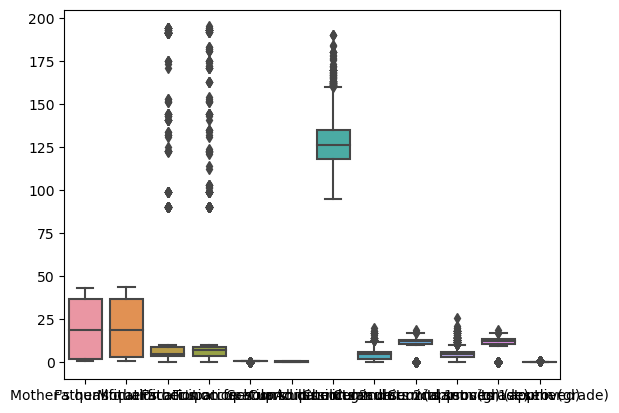

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


# Isolation Forest to detect outliers
isolation_forest = IsolationForest(contamination=0.05)  # Adjust contamination threshold as needed
outliers = isolation_forest.fit_predict(X_train)

# Flag outliers: -1 means an outlier, 1 means normal
X_train['outlier'] = (outliers == -1).astype(int)

# Investigate outliers
sns.boxplot(data=X_train)
plt.show()


In [287]:
# Robust Scaler: scales features robust to outliers
robust_scaler = RobustScaler()

# QuantileTransformer for normalizing the data
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Apply RobustScaler and QuantileTransformer
X_train_scaled = robust_scaler.fit_transform(X_train)
X_train_quantiled = quantile_transformer.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)
X_test_quantiled = quantile_transformer.transform(X_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predictions
- true_labels


In [284]:
!pip install --upgrade scikit-learn


In [286]:
!pip install --upgrade imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
